In [1]:
# Import depedencies
import numpy as np
import pandas as pd
from pathlib import Path
# from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import balanced_accuracy_score
# from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced


# Read the CSV and Perform Basic Data Cleaning

In [2]:
#Load data
file_path = Path('../Final_Project_Resources/final.csv')
df = pd.read_csv (file_path)
df.head()



,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean
1,2000-04-01,AUD,Australia,2.59,1,2.59,2000,AUS,4.001431,45806.687448,9.001655e+11,36.0,Oceania,Australia and New Zealand
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000,BRA,3.053462,8954.837245,1.607729e+12,76.0,Americas,Latin America and the Caribbean
3,2000-04-01,CAD,Canada,2.85,1,2.85,2000,CAN,3.016889,44863.216018,1.406914e+12,124.0,Americas,Northern America
4,2000-04-01,CLP,Chile,1260.00,514,2.45,2000,CHL,3.106971,9814.656135,1.539371e+11,152.0,Americas,Latin America and the Caribbean


In [3]:
# Convert the 'GDP' column into log10
df['GDP_log10'] = np.log10(df['GDP'])


In [4]:
df.head()

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean,11.412094
1,2000-04-01,AUD,Australia,2.59,1,2.59,2000,AUS,4.001431,45806.687448,9.001655e+11,36.0,Oceania,Australia and New Zealand,11.954322
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000,BRA,3.053462,8954.837245,1.607729e+12,76.0,Americas,Latin America and the Caribbean,12.206213
3,2000-04-01,CAD,Canada,2.85,1,2.85,2000,CAN,3.016889,44863.216018,1.406914e+12,124.0,Americas,Northern America,12.148268
4,2000-04-01,CLP,Chile,1260.00,514,2.45,2000,CHL,3.106971,9814.656135,1.539371e+11,152.0,Americas,Latin America and the Caribbean,11.187343


In [5]:
df.describe()

,local_price,dollar_ex,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP,country_code,GDP_log10
count,9.200000e+02,9.200000e+02,920.000000,920.000000,920.000000,920.000000,9.200000e+02,920.000000,920.000000
mean,1.393870e+04,5.331433e+03,3.567609,2010.279348,3.070198,26113.144578,1.342889e+12,438.443478,11.678427
std,2.225534e+05,8.499408e+04,1.517102,4.525734,3.220871,22923.009189,2.847060e+12,258.334203,0.576048
min,2.040000e+00,1.000000e+00,0.800000,2000.000000,-14.758545,970.941956,2.229865e+10,32.000000,10.348279
25%,4.675000e+00,1.000000e+00,2.497500,2007.000000,1.601224,7495.754301,2.108129e+11,188.000000,11.323895
50%,1.395000e+01,5.000000e+00,3.330000,2012.000000,2.850864,14771.257645,3.945133e+11,416.000000,11.596062
75%,8.550000e+01,3.825000e+01,4.290000,2014.000000,4.789940,46498.842667,1.041007e+12,682.000000,12.017448
max,4.000000e+06,1.600500e+06,11.250000,2016.000000,25.162533,92121.421135,1.784427e+13,858.000000,13.251499


# Testing ML to a single country-Argentina

In [6]:
# Creating a new Dataframe containing entries from Argentina
df_Argentina = df.loc[df['Country'] == "Argentina"]

In [7]:
df_Argentina.head(5)

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean,11.412094
22,2001-04-01,ARS,Argentina,2.50,1,2.50,2001,ARG,8.837041,7380.467087,2.811063e+11,32.0,Americas,Latin America and the Caribbean,11.448871
44,2002-04-01,ARS,Argentina,2.50,3,0.83,2002,ARG,9.029573,7962.412309,3.064890e+11,32.0,Americas,Latin America and the Caribbean,11.486415
70,2003-04-01,ARS,Argentina,4.10,2,2.05,2003,ARG,8.851660,8577.864994,3.336183e+11,32.0,Americas,Latin America and the Caribbean,11.523250
94,2004-05-01,ARS,Argentina,4.36,2,2.18,2004,ARG,8.047152,9174.502458,3.604651e+11,32.0,Americas,Latin America and the Caribbean,11.556863


# Applying Linear Regression Model

In [8]:
# Defining feature (X) and the variable (y)
X = df_Argentina.GDP_log10.values.reshape(-1,1)
y = df_Argentina.dollar_price.values.reshape(-1,1)

In [9]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()


In [10]:
# training the model
model.fit(X,y)

LinearRegression()

In [11]:
# Predicting the target value
y_pred = model.predict(X)

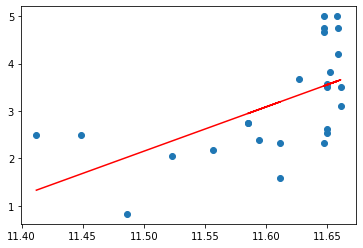

In [12]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [13]:
# R-square for the model
print(model.score(X,y))

0.3418210010914241


# Applying Linear Regression to Argentina GDP_Per_Capita

In [14]:
# Using per capita GDP as X and dollar_price as y
X = df_Argentina.GDP_Per_Capita.values.reshape(-1,1)
y = df_Argentina.dollar_price.values.reshape(-1,1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()


In [16]:
# training the model
model.fit(X,y)

LinearRegression()

In [17]:
# Predicting target value for the data set
y_pred = model.predict(X)

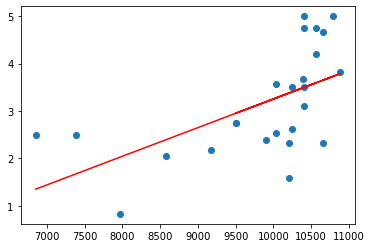

In [18]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [19]:
# R-square for the model
print(model.score(X,y))

0.32965882846581684


# Applying RandomForest Regressor to Argentina

In [20]:
df_Argentina.head(2)

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,2000-04-01,ARS,Argentina,2.5,1,2.5,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean,11.412094
22,2001-04-01,ARS,Argentina,2.5,1,2.5,2001,ARG,8.837041,7380.467087,2.811063e+11,32.0,Americas,Latin America and the Caribbean,11.448871


In [21]:
# Dropping columns "local_price", "dollar_ex" and columns with strings
df_Argentina_modified = df_Argentina.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region', 'local_price', 'dollar_ex'], axis =1)

In [22]:
# Defining Feature(X) and variable (y)
X = df_Argentina_modified
y = df_Argentina_modified.dollar_price

In [23]:
# Splitting the data set into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [24]:
# Instantiate the RadomForestRegressor
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

In [25]:
# Fitting the model
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [26]:
# Predicting the target value
y_pred =model.predict(X_test)

In [27]:
# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.087


# Ending Argentina Section

# Begining new section using entire dataset
# Applying RandomForest Regressor using multiple feature to entire dataset

In [28]:
# Dropping column "local_price", "dollar_ex" and those containing string
df_values = df.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region', 'local_price', 'dollar_ex', 'GDP_log10'], axis=1)

In [29]:
df_values.head()

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
0,2.50,2000,-10.894485,6854.294081,2.582818e+11
1,2.59,2000,4.001431,45806.687448,9.001655e+11
2,2.95,2000,3.053462,8954.837245,1.607729e+12
3,2.85,2000,3.016889,44863.216018,1.406914e+12
4,2.45,2000,3.106971,9814.656135,1.539371e+11


In [30]:
# Defining the feature (X)
X = df_values.drop('dollar_price', axis=1)
X.head()

,Year,gdp_growth,GDP_Per_Capita,GDP
0,2000,-10.894485,6854.294081,2.582818e+11
1,2000,4.001431,45806.687448,9.001655e+11
2,2000,3.053462,8954.837245,1.607729e+12
3,2000,3.016889,44863.216018,1.406914e+12
4,2000,3.106971,9814.656135,1.539371e+11


In [31]:
# Defining the target (y)
y = df_values['dollar_price']

In [32]:
len(df_values)

920

In [33]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [34]:
# # Feature Scaling
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [35]:
# Instantiate the model
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

In [36]:
# Fitting the model
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [37]:
# Predicting the target value
y_pred =model.predict(X_test)

In [38]:
# RMSE is improved when columns "local_price" and "dollar_ex" are dropped
# RMSE is best when n_estimator is kept at 10

In [39]:
# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.72


In [40]:
errors = abs((y_pred - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 0.11


In [41]:
# Calculate feature importance in Random Forest Model
importance = model.feature_importances_
importance

array([0.12139211, 0.10782021, 0.61419956, 0.15658812])

# Applying ML to Canada

In [42]:
# Creating a new Dataframe containing entries from Canada
df_Canada = df.loc[df['Country'] == "Canada"]

In [43]:
len(df_Canada)

25

# Applying Linear Regression Model

In [44]:
# Defining the feature (X) and target (y)
X = df_Canada.GDP_log10.values.reshape(-1,1)
y = df_Canada.dollar_price.values.reshape(-1,1)

In [45]:
# Splitting the dataset into traning and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()


In [46]:
# training the model
model.fit(X,y)

LinearRegression()

In [47]:
# Predicting the target value
y_pred = model.predict(X)

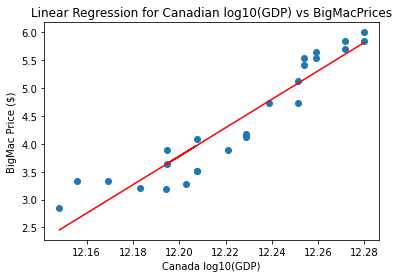

In [48]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Canada log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for Canadian log10(GDP) vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

In [49]:
# R-square for the model
print(model.score(X,y))

0.8913158240296158


# Applying RandomForest Regressor to Canada

In [50]:
# Dropping columns "local_price", dollar_ex" and those containing strings
df_Canada_modified = df_Canada.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region', 'local_price', 'dollar_ex'], axis =1)

In [51]:
df_Canada_modified.head()

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP,GDP_log10
3,2.85,2000,3.016889,44863.216018,1.406914e+12,12.148268
25,3.33,2001,1.800895,45261.338064,1.432251e+12,12.156019
47,3.33,2002,3.087256,46225.360869,1.476468e+12,12.169224
73,3.20,2003,3.202910,47257.472197,1.523758e+12,12.182916
97,3.19,2004,2.634566,48014.931197,1.563903e+12,12.194210


In [52]:
# Defining Feature(X) and variable (y)
X = df_Canada_modified
y = df_Canada_modified.dollar_price

In [53]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [54]:
# Instantiate the RandomForestRegression Model
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

In [55]:
# Fitting the model
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [56]:
# Predicting the target value
y_pred =model.predict(X_test)

In [57]:
# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.1


In [58]:
# Calculate feature importance in Random Forest Model
importance = model.feature_importances_
importance

array([0.32864282, 0.27728817, 0.00408444, 0.17417426, 0.10363628,
       0.11217404])

# End Section

# Applying ML to United States

In [59]:
# Creating a new Dataframe containing entries from United States
df_USA = df.loc[df['Country'] == "United States"]

In [60]:
len(df_USA)

25

# Applying Linear Regression Model

In [61]:
# Defining the feature (X) and target (y)
X = df_USA.GDP_log10.values.reshape(-1,1)
y = df_USA.dollar_price.values.reshape(-1,1)

In [62]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()


In [63]:
# training the model
model.fit(X,y)

LinearRegression()

In [64]:
# Predicting the target value
y_pred = model.predict(X)

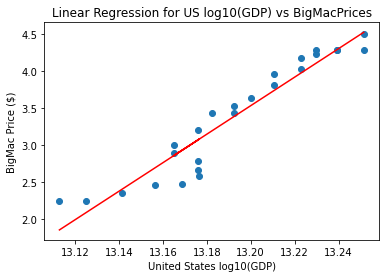

In [65]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('United States log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for US log10(GDP) vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

In [66]:
# R-square for the model
print(model.score(X,y))

0.9106357239150655


# Applying RandomForest Regressor to USA

In [67]:
# Dropping columns "local_price", "dollar_ex" and those with string values
df_USA_modified = df_USA.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region', 'local_price', 'dollar_ex', 'GDP_log10'], axis =1)

In [68]:
df_USA_modified.head(5)

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
21,2.24,2000,1.741695,45087.367279,1.296826e+13
43,2.24,2001,2.861211,45980.514585,1.333931e+13
69,2.35,2002,3.798891,47287.593772,1.384606e+13
93,2.46,2003,3.513214,48499.812376,1.433250e+13
124,2.47,2004,2.854972,49405.767296,1.474169e+13


In [69]:
# Defining Feature(X) and variable (y)
X = df_USA_modified
y = df_USA_modified.dollar_price

In [70]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [71]:
# Instantiate the RandomForestRegression model
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

In [72]:
# Fitting the model
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [73]:
# Predicting the model
y_pred =model.predict(X_test)

In [74]:
# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.216


In [75]:
# Calculate feature importance in Random Forest Model
importance = model.feature_importances_
importance

array([0.22396968, 0.52008519, 0.01006697, 0.11407431, 0.13180385])

# End Section

# Looking at geographical regions

# Americas

In [76]:
df_Americas = df.loc[df['region'] == "Americas"]

In [77]:
df_Americas.head()

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean,11.412094
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000,BRA,3.053462,8954.837245,1.607729e+12,76.0,Americas,Latin America and the Caribbean,12.206213
3,2000-04-01,CAD,Canada,2.85,1,2.85,2000,CAN,3.016889,44863.216018,1.406914e+12,124.0,Americas,Northern America,12.148268
4,2000-04-01,CLP,Chile,1260.00,514,2.45,2000,CHL,3.106971,9814.656135,1.539371e+11,152.0,Americas,Latin America and the Caribbean,11.187343
13,2000-04-01,MXN,Mexico,20.90,9,2.32,2000,MEX,-0.039844,8960.554086,9.111518e+11,484.0,Americas,Latin America and the Caribbean,11.959591


In [78]:
# Defining the feature (X) and target (y)
X = df_Americas.GDP_log10.values.reshape(-1,1)
y = df_Americas.dollar_price.values.reshape(-1,1)

In [79]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()

# training the model
model.fit(X,y)

# Predicting the target value
y_pred = model.predict(X)

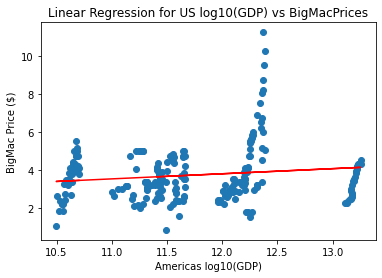

In [80]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Americas log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for US log10(GDP) vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

In [81]:
# R-square for the model
print(model.score(X,y))

0.019583795772267654


In [82]:
# Applying RandomForestRegression to Americas

In [83]:
# Dropping columns "local_price", "dollar_ex" and those with string values
df_Americas_modified = df_Americas.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region',
                               'local_price', 'dollar_ex', 'GDP_log10'], axis =1)

df_Americas_modified.head(5)

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
0,2.50,2000,-10.894485,6854.294081,2.582818e+11
2,2.95,2000,3.053462,8954.837245,1.607729e+12
3,2.85,2000,3.016889,44863.216018,1.406914e+12
4,2.45,2000,3.106971,9814.656135,1.539371e+11
13,2.32,2000,-0.039844,8960.554086,9.111518e+11


In [84]:
# Defining Feature(X) and variable (y)
X = df_Americas_modified
y = df_Americas_modified.dollar_price

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

# Instantiate the RandomForestRegression model
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

# Fitting the model
model.fit(X_train, y_train)

# Predicting the model
y_pred =model.predict(X_test)

# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

#  Asia

In [87]:
df_Asia = df.loc[df['region'] == "Asia"]
df_Asia.head()

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
5,2000-04-01,CNY,China,9.90,8,1.24,2000,CHN,9.130646,2061.162284,2.639112e+12,156.0,Asia,Eastern Asia,12.421458
9,2000-04-01,IDR,Indonesia,14500.00,7945,1.83,2000,IDN,4.499475,2259.307704,4.910781e+11,360.0,Asia,South-eastern Asia,11.691151
10,2000-04-01,ILS,Israel,14.50,4,3.62,2000,ISR,0.012565,26521.377672,1.742455e+11,376.0,Asia,Western Asia,11.241161
11,2000-04-01,JPY,Japan,294.00,106,2.77,2000,JPN,0.117993,42190.804873,5.377007e+12,392.0,Asia,Eastern Asia,12.730541
12,2000-04-01,MYR,Malaysia,4.52,3,1.51,2000,MYS,5.390988,7112.055595,1.721714e+11,458.0,Asia,South-eastern Asia,11.235961


In [88]:
# Defining the feature (X) and target (y)
X = df_Asia.GDP_log10.values.reshape(-1,1)
y = df_Asia.dollar_price.values.reshape(-1,1)

In [89]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()

# training the model
model.fit(X,y)

# Predicting the target value
y_pred = model.predict(X)

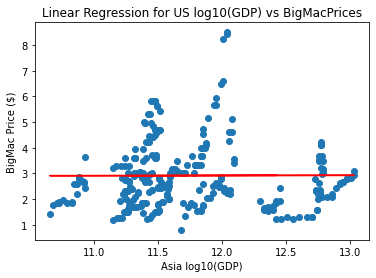

In [90]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Asia log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for US log10(GDP) vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

# Applying RandomForestRegression to Asia

In [92]:
# Dropping columns "local_price", "dollar_ex" and those with string values
df_Asia_modified = df_Asia.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region',
                               'local_price', 'dollar_ex', 'GDP_log10'], axis =1)

df_Asia_modified.head(5)

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
5,1.24,2000,9.130646,2061.162284,2.639112e+12
9,1.83,2000,4.499475,2259.307704,4.910781e+11
10,3.62,2000,0.012565,26521.377672,1.742455e+11
11,2.77,2000,0.117993,42190.804873,5.377007e+12
12,1.51,2000,5.390988,7112.055595,1.721714e+11


In [93]:
# Defining Feature(X) and variable (y)
X = df_Asia_modified
y = df_Asia_modified.dollar_price

In [94]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

# Instantiate the RandomForestRegression model
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

# Fitting the model
model.fit(X_train, y_train)

# Predicting the model
y_pred =model.predict(X_test)

# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.022


In [95]:
errors = abs((y_pred - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 0.01


# Europe

In [139]:
df_Europe = df.loc[df['region'] == "Europe"]
df_Europe.head()

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
6,2000-04-01,CZK,Czech Republic,54.37,39,1.39,2000,CZE,1.652494,15577.392205,1.588414e+11,203.0,Europe,Eastern Europe,11.200964
7,2000-04-01,DKK,Denmark,24.75,8,3.09,2000,DNK,0.466346,56190.811248,3.020779e+11,208.0,Europe,Northern Europe,11.480119
8,2000-04-01,HUF,Hungary,339.00,279,1.22,2000,HUN,4.528206,11450.283836,1.163189e+11,348.0,Europe,Eastern Europe,11.065650
15,2000-04-01,PLN,Poland,5.50,4,1.38,2000,POL,2.041716,8815.459020,3.370182e+11,616.0,Europe,Eastern Europe,11.527653
18,2000-04-01,SEK,Sweden,24.00,8,3.00,2000,SWE,2.075301,46123.936988,4.116542e+11,752.0,Europe,Northern Europe,11.614533


In [140]:
# Defining the feature (X) and target (y)
X = df_Europe.GDP_log10.values.reshape(-1,1)
y = df_Europe.dollar_price.values.reshape(-1,1)

In [141]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()

# training the model
model.fit(X,y)

# Predicting the target value
y_pred = model.predict(X)

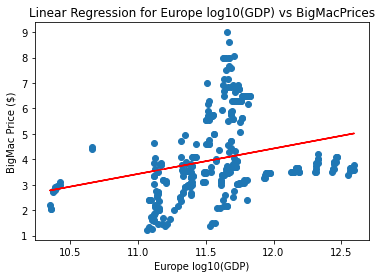

In [142]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Europe log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for Europe log10(GDP) vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

# Applying RandomForestRegression to Europe

In [143]:
# Dropping columns "local_price", "dollar_ex" and those with string values
df_Europe_modified = df_Europe.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region',
                               'local_price', 'dollar_ex', 'GDP_log10'], axis =1)

df_Europe_modified.head(5)

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
6,1.39,2000,1.652494,15577.392205,1.588414e+11
7,3.09,2000,0.466346,56190.811248,3.020779e+11
8,1.22,2000,4.528206,11450.283836,1.163189e+11
15,1.38,2000,2.041716,8815.459020,3.370182e+11
18,3.00,2000,2.075301,46123.936988,4.116542e+11


In [144]:
# Defining Feature(X) and variable (y)
X = df_Europe_modified
y = df_Europe_modified.dollar_price

In [145]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

# Instantiate the RandomForestRegression model
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

# Fitting the model
model.fit(X_train, y_train)

# Predicting the model
y_pred =model.predict(X_test)

# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.041


# Top Five GDPs

In [151]:
topFive = ['USA', 'CHN', 'JPN', 'DEU', 'FRA']
df_topFive = df.loc[df['Code'].isin(topFive)]
df_topFive

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
5,2000-04-01,CNY,China,9.90,8,1.24,2000,CHN,9.130646,2061.162284,2.639112e+12,156.0,Asia,Eastern Asia,12.421458
11,2000-04-01,JPY,Japan,294.00,106,2.77,2000,JPN,0.117993,42190.804873,5.377007e+12,392.0,Asia,Eastern Asia,12.730541
21,2000-04-01,USD,United States,2.24,1,2.24,2000,USA,1.741695,45087.367279,1.296826e+13,840.0,Americas,Northern America,13.112882
27,2001-04-01,CNY,China,9.90,8,1.24,2001,CHN,10.035603,2253.929689,2.903963e+12,156.0,Asia,Eastern Asia,12.462991
32,2001-04-01,JPY,Japan,294.00,124,2.37,2001,JPN,1.528220,42744.011285,5.459180e+12,392.0,Asia,Eastern Asia,12.737127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,2016-07-01,CNY,China,18.60,6,3.10,2016,CHN,6.600000,7754.962119,1.080057e+13,156.0,Asia,Eastern Asia,13.033447
887,2016-07-01,EUR,France,4.10,1,4.10,2016,FRA,1.724881,43663.584924,2.924903e+12,250.0,Europe,Western Europe,12.466112
888,2016-07-01,EUR,Germany,3.79,1,3.79,2016,DEU,1.425303,47501.812652,3.939227e+12,276.0,Europe,Western Europe,12.595411
896,2016-07-01,JPY,Japan,370.00,106,3.49,2016,JPN,0.787965,48919.560886,6.189748e+12,392.0,Asia,Eastern Asia,12.791673


In [152]:
# Defining the feature (X) and target (y)
X = df_topFive.GDP_log10.values.reshape(-1,1)
y = df_topFive.dollar_price.values.reshape(-1,1)

In [153]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()

# training the model
model.fit(X,y)

# Predicting the target value
y_pred = model.predict(X)

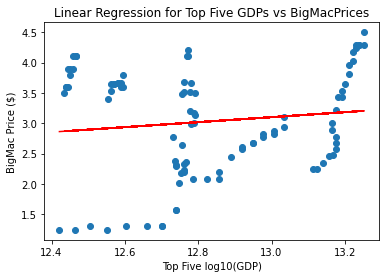

In [154]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Top Five log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for Top Five GDPs vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

In [155]:
# Dropping columns "local_price", "dollar_ex" and those with string values
df_topFive_modified = df_topFive.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region',
                               'local_price', 'dollar_ex', 'GDP_log10'], axis =1)

df_topFive_modified.head(5)

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
5,1.24,2000,9.130646,2061.162284,2.639112e+12
11,2.77,2000,0.117993,42190.804873,5.377007e+12
21,2.24,2000,1.741695,45087.367279,1.296826e+13
27,1.24,2001,10.035603,2253.929689,2.903963e+12
32,2.37,2001,1.528220,42744.011285,5.459180e+12


In [157]:
# Defining Feature(X) and variable (y)
X = df_topFive_modified
y = df_topFive_modified.dollar_price

In [158]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

# Instantiate the RandomForestRegression model
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

# Fitting the model
model.fit(X_train, y_train)

# Predicting the model
y_pred =model.predict(X_test)

# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.13


In [ ]:
# Bottom Five GDP's

In [160]:
bottomFive = ['EST', 'URY', 'CRI', 'LKA', 'HUN']
df_bottomFive = df.loc[df['Code'].isin(bottomFive)]
df_bottomFive.head()

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
8,2000-04-01,HUF,Hungary,339.0,279,1.22,2000,HUN,4.528206,11450.283836,1.163189e+11,348.0,Europe,Eastern Europe,11.065650
30,2001-04-01,HUF,Hungary,399.0,303,1.32,2001,HUN,3.848620,11925.070207,1.207956e+11,348.0,Europe,Eastern Europe,11.082051
52,2002-04-01,HUF,Hungary,459.0,272,1.69,2002,HUN,5.004918,12549.669359,1.268413e+11,348.0,Europe,Eastern Europe,11.103261
78,2003-04-01,HUF,Hungary,490.0,224,2.19,2003,HUN,4.388215,13126.455655,1.324074e+11,348.0,Europe,Eastern Europe,11.121912
101,2004-05-01,CRC,Costa Rica,1130.0,433,2.61,2004,CRI,7.237733,7289.904345,3.167764e+10,188.0,Americas,Latin America and the Caribbean,10.500753


In [161]:
# Defining the feature (X) and target (y)
X = df_bottomFive.GDP_log10.values.reshape(-1,1)
y = df_bottomFive.dollar_price.values.reshape(-1,1)

In [162]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()

# training the model
model.fit(X,y)

# Predicting the target value
y_pred = model.predict(X)

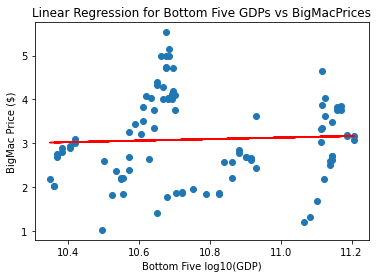

In [164]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Bottom Five log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for Bottom Five GDPs vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

In [165]:
# Dropping columns "local_price", "dollar_ex" and those with string values
df_bottomFive_modified = df_bottomFive.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region',
                               'local_price', 'dollar_ex', 'GDP_log10'], axis =1)

df_bottomFive_modified.head(5)

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
8,1.22,2000,4.528206,11450.283836,1.163189e+11
30,1.32,2001,3.848620,11925.070207,1.207956e+11
52,1.69,2002,5.004918,12549.669359,1.268413e+11
78,2.19,2003,4.388215,13126.455655,1.324074e+11
101,2.61,2004,7.237733,7289.904345,3.167764e+10


In [166]:
# Defining Feature(X) and variable (y)
X = df_bottomFive_modified
y = df_bottomFive_modified.dollar_price

In [167]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

# Instantiate the RandomForestRegression model
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

# Fitting the model
model.fit(X_train, y_train)

# Predicting the model
y_pred =model.predict(X_test)

# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.118


# Scrapsheets

In [96]:
# # Define independent variable, I am using the log(GDP)
# X =df.GDP_log10.values.reshape(-1,1)

In [97]:
# # Define dependent variable, I am assuming that the column header will be "price"
# y= df.dollar_price.values.reshape(-1,1)

In [98]:
# scaler = StandardScaler()

In [99]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [100]:
# # Instantiate linear regression model
# model = LinearRegression()


In [101]:
# # training the model
# model.fit(X,y)

In [102]:
# y_pred = model.predict(X)

In [103]:
# plt.scatter(X, y)
# plt.plot(X, y_pred, color='red')
# plt.show()

In [104]:
# print(model.coef_)
# print(model.intercept_)

In [105]:
# print(model.score(X,y))

# Using 2nd Polynomial

In [106]:
# Import dependencies
from sklearn.preprocessing import PolynomialFeatures

# Save an instance of Polynomial Feature
poly = PolynomialFeatures(degree=2, include_bias=True)

In [107]:
# poly_features = poly.fit_transform(X.reshape(-1,1))

In [108]:
# y

In [109]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [110]:
# poly_reg_model = LinearRegression()

In [111]:
# poly_reg_model.fit(X_train, y_train)

In [112]:
# y_predicted = poly_reg_model.predict(X_test)
# y_predicted

In [113]:
# from sklearn.metrics import mean_squared_error

In [114]:
# poly_reg_rmse = np.sqrt(mean_squared_error(y_test,
#                                           y_predicted))
# poly_reg_rmse

In [115]:
# plt.figure(figsize= (10,6))
# plt.title("Polynomial Reg", size=16)
# plt.scatter(X, y)
# plt.plot(X, y_predicted, c='red')
# plt.show()

# Lets try RandomForestRegressor

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [117]:
# X =df.GDP_log10.values.reshape(-1,1)
# y= df.dollar_price

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [119]:
# Creating a StandardScalar instance
scaler = StandardScaler()

# Fitting the Standard Scalar with the training data
X_scalar = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scalar.transform(X_train)
X_test_scaled = X_scalar.transform(X_test)

In [120]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=0)

In [121]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [122]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [123]:
# Calculating the accuracy score
mse = mean_squared_error(y_test, predictions)

rmse = mse**0.5

print(mse)
print(rmse)

0.00037739357260271926
0.019426620205345017


In [124]:
# Calculate feature importance in Random Forest Model
importance = rf_model.feature_importances_
importance

array([9.93680277e-01, 6.74477450e-04, 8.33469647e-04, 9.12843461e-04,
       3.89893211e-03])